# View controller

View control for searchers launched in s1_ridge_trials.ipynb.

### Searcher monitoring

In [7]:
%reset -f
from search import ridge

# list active searchers
ridge.search_status(smln_id='smln_2', recent=30)

The following searchers were active in the last 2 s:

smln_2   19   smln_2_random
smln_2   20   smln_2_guided

No searchers were suspended by errors.


In [10]:
# read optional error message
ridge.read_search_error(searcher_id=20)

No error found in searcher 20.


### Results scatter plot

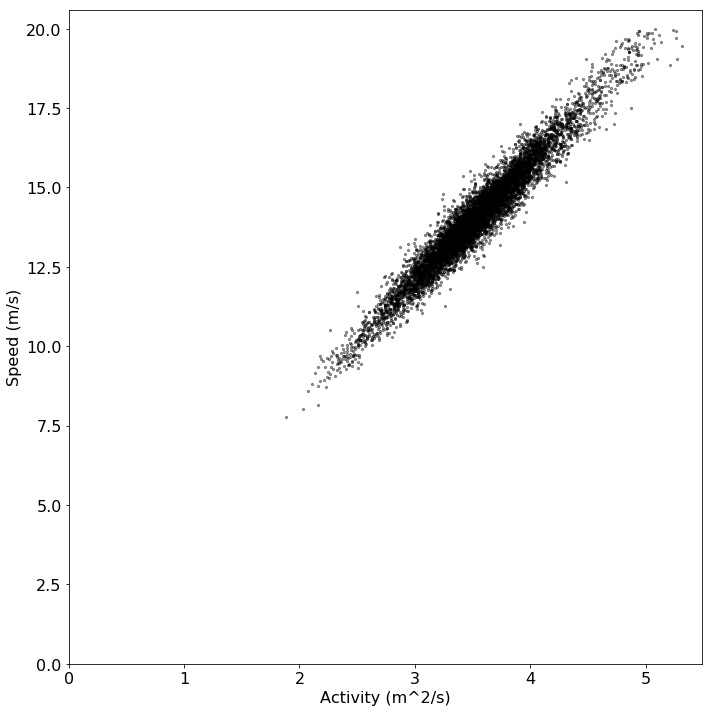

In [11]:
%reset -f
%matplotlib inline

import aux
from db.d_models import RidgeTrial as T
from search import ridge_viz

import PARAMETERS as P
from search import ridge_global as C


pre = {
    'w_n_pc_ec_vs_dist': aux.load(C.PATH_W_N_PC_EC_VS_DIST),
    'v_g_n_vs_w_n_pc_ec_fr_ec': aux.load(C.PATH_V_G_N_VS_W_N_PC_EC_FR_EC)
}

ridge_viz.rslt_scatter(
    smln_id='smln_2',
    filt=[T.stability > 0.5, T.activity < 6, T.speed < 20],
    lmt=10000, c='k', s=5, alpha=.4);

### Fast trial lookup

In [12]:
ridge_viz.select_trials(
    smln_id='smln_2',
    filt=[T.stability > 0.5, T.speed < 12], order_by='speed', lmt=15
    )[[
        'id', 'speed', 'p_inh', 'rho_pc', 'z_pc', 'l_pc', 'w_a_pc_pc', 'p_a_inh_pc',
        'w_a_inh_pc', 'p_g_pc_inh', 'w_g_pc_inh', 'fr_ec'
    ]]

,id,speed,p_inh,rho_pc,z_pc,l_pc,w_a_pc_pc,p_a_inh_pc,w_a_inh_pc,p_g_pc_inh,w_g_pc_inh,fr_ec
0,108787,7.768561,0.099659,11578.067123,1.086758,0.025617,0.006926,0.083726,0.002357,0.041418,0.015244,37.154072
1,108032,8.039267,0.103101,10536.517350,1.083967,0.027264,0.006682,0.083098,0.002202,0.042366,0.015021,37.578597
2,107550,8.142423,0.103101,10536.517350,1.083967,0.027264,0.006682,0.083098,0.002202,0.042366,0.015021,37.578597
3,108470,8.575444,0.100338,11567.779923,1.074893,0.026117,0.006831,0.081889,0.002082,0.041403,0.015386,37.439356
4,108637,8.716352,0.100760,11571.931120,1.073963,0.025895,0.006862,0.079643,0.002088,0.041926,0.015511,37.443396
5,108754,8.735318,0.099752,11568.067033,1.084827,0.025845,0.006914,0.083233,0.002293,0.041404,0.015236,37.222733
6,108036,8.796071,0.103101,10536.517350,1.083967,0.027264,0.006682,0.083098,0.002202,0.042366,0.015021,37.578597
7,108322,8.901668,0.102005,11552.875022,1.080546,0.026227,0.006710,0.084013,0.002167,0.042661,0.015209,37.758141
8,108221,8.950996,0.103101,11536.517350,1.083967,0.026059,0.006682,0.083098,0.002202,0.042366,0.015021,37.578597
9,108749,8.989830,0.100089,11568.072618,1.083184,0.025909,0.006978,0.082896,0.002286,0.041306,0.015215,37.219042


### Example trials

RSLTS:
{'STABILITY': 1.0, 'ACTIVITY': 1.8855237900413877, 'SPEED': 7.7685614287292681}


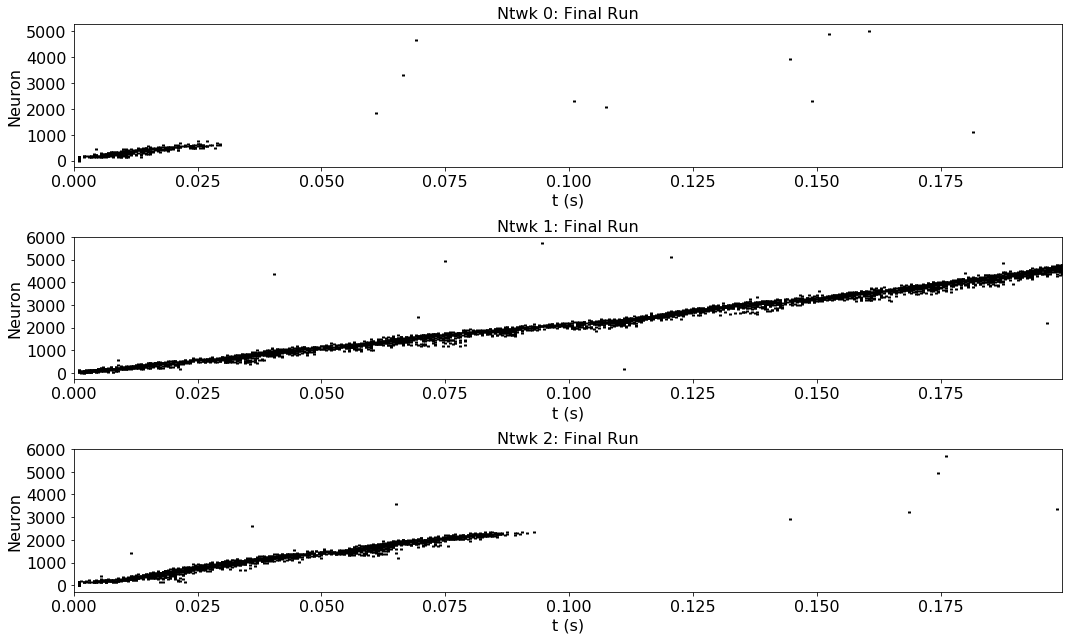

In [13]:
ridge_viz.raster(108787, pre, C, P, ax_height=3, colors=None, s=5);

RSLTS:
{'STABILITY': 1.0, 'ACTIVITY': 2.3459987762367733, 'SPEED': 9.4726427344375494}


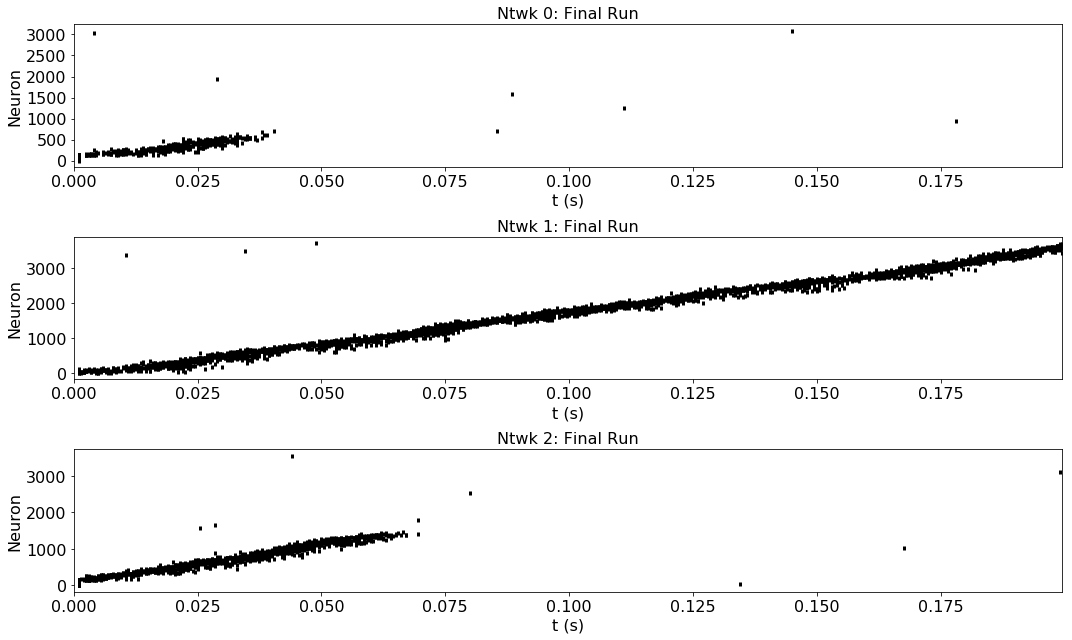

In [5]:
ridge_viz.raster(71035, pre, C, P, ax_height=3, colors=None);

RSLTS:
{'STABILITY': 1.0, 'ACTIVITY': 2.1642576536082871, 'SPEED': 8.1424226693360868}


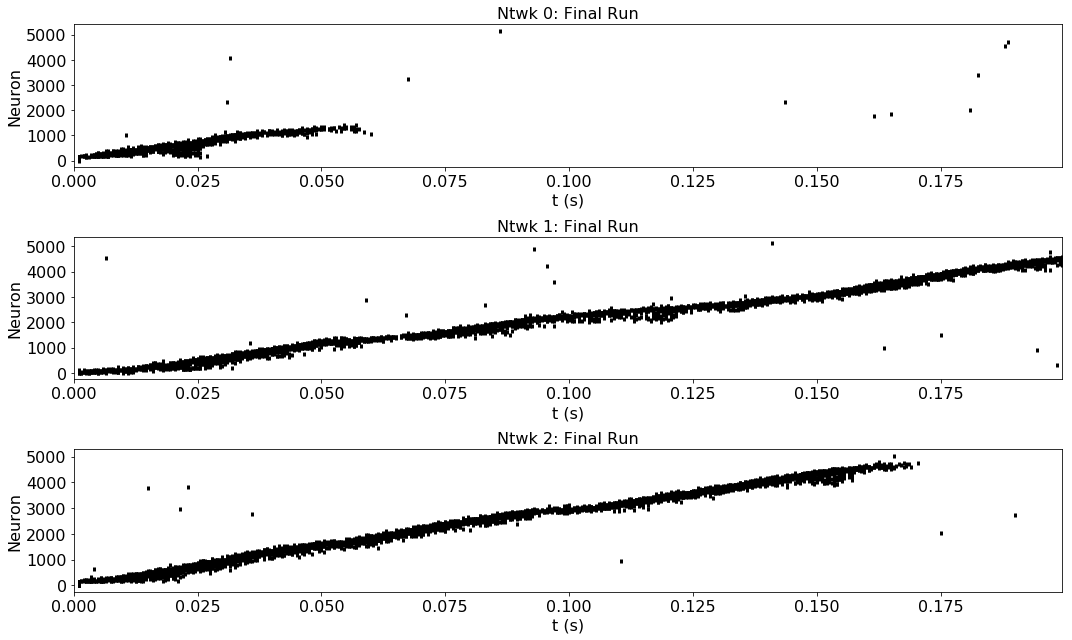

In [9]:
ridge_viz.raster(107550, pre, C, P, ax_height=3, colors=None);

In [15]:
ridge_viz.print_trial(108787)

TRIAL 108787

SEED = 5596

PARAMS:
{'FR_EC': 37.1540719080865,
 'L_PC': 0.0256167529633419,
 'P_A_INH_PC': 0.0837256760217976,
 'P_G_PC_INH': 0.0414177348411754,
 'P_INH': 0.0996587153033559,
 'RHO_PC': 11578.0671230118,
 'RIDGE_H': 0.25,
 'RIDGE_W': 2.0,
 'W_A_INH_PC': 0.00235735925373169,
 'W_A_PC_PC': 0.00692566504489662,
 'W_G_PC_INH': 0.0152438151476479,
 'Z_PC': 1.08675762262723}

RSLTS:
{'ACTIVITY': 1.88552379004138, 'SPEED': 7.76856142872927, 'STABILITY': 1.0}


### Parameter analysis

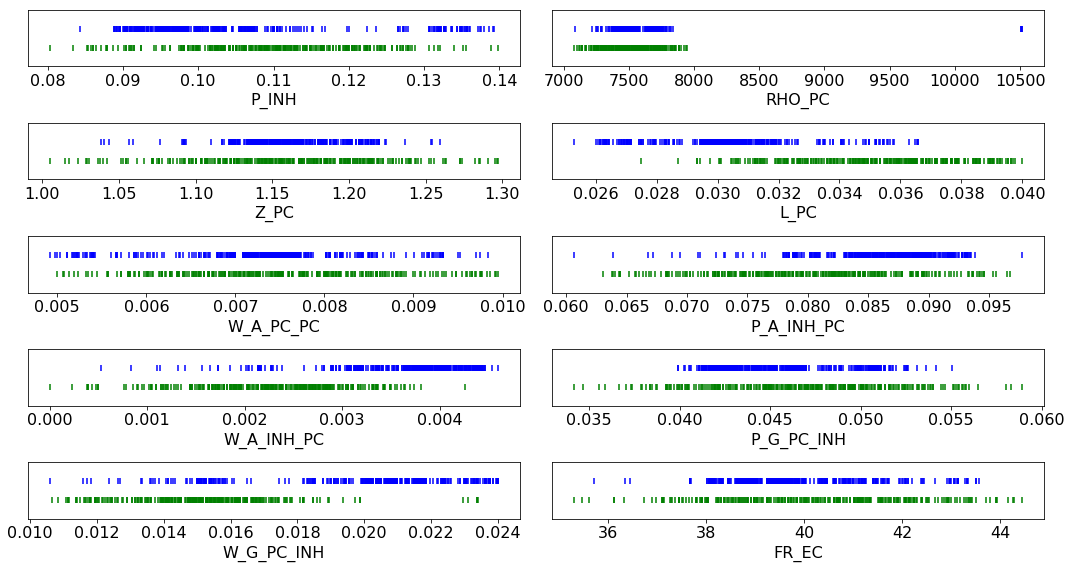

In [8]:
ridge_viz.trial_set_scatter(
    smln_id='smln_2',
    filts=[
        [T.stability > 0.5, T.speed < 12],
        [T.stability > 0.5, T.speed >= 20],
    ], cs=('b', 'g'), lmt=1000, s=30, marker='|', seed=0);